## BPSK Pulse

C:\Users\24365\AppData\Local\Temp\ipykernel_198396\694956607.py:39: RuntimeWarning: divide by zero encountered in log10
  s = 20 * np.log10(np.abs(fft(bpsk)[:N//2]) / N)


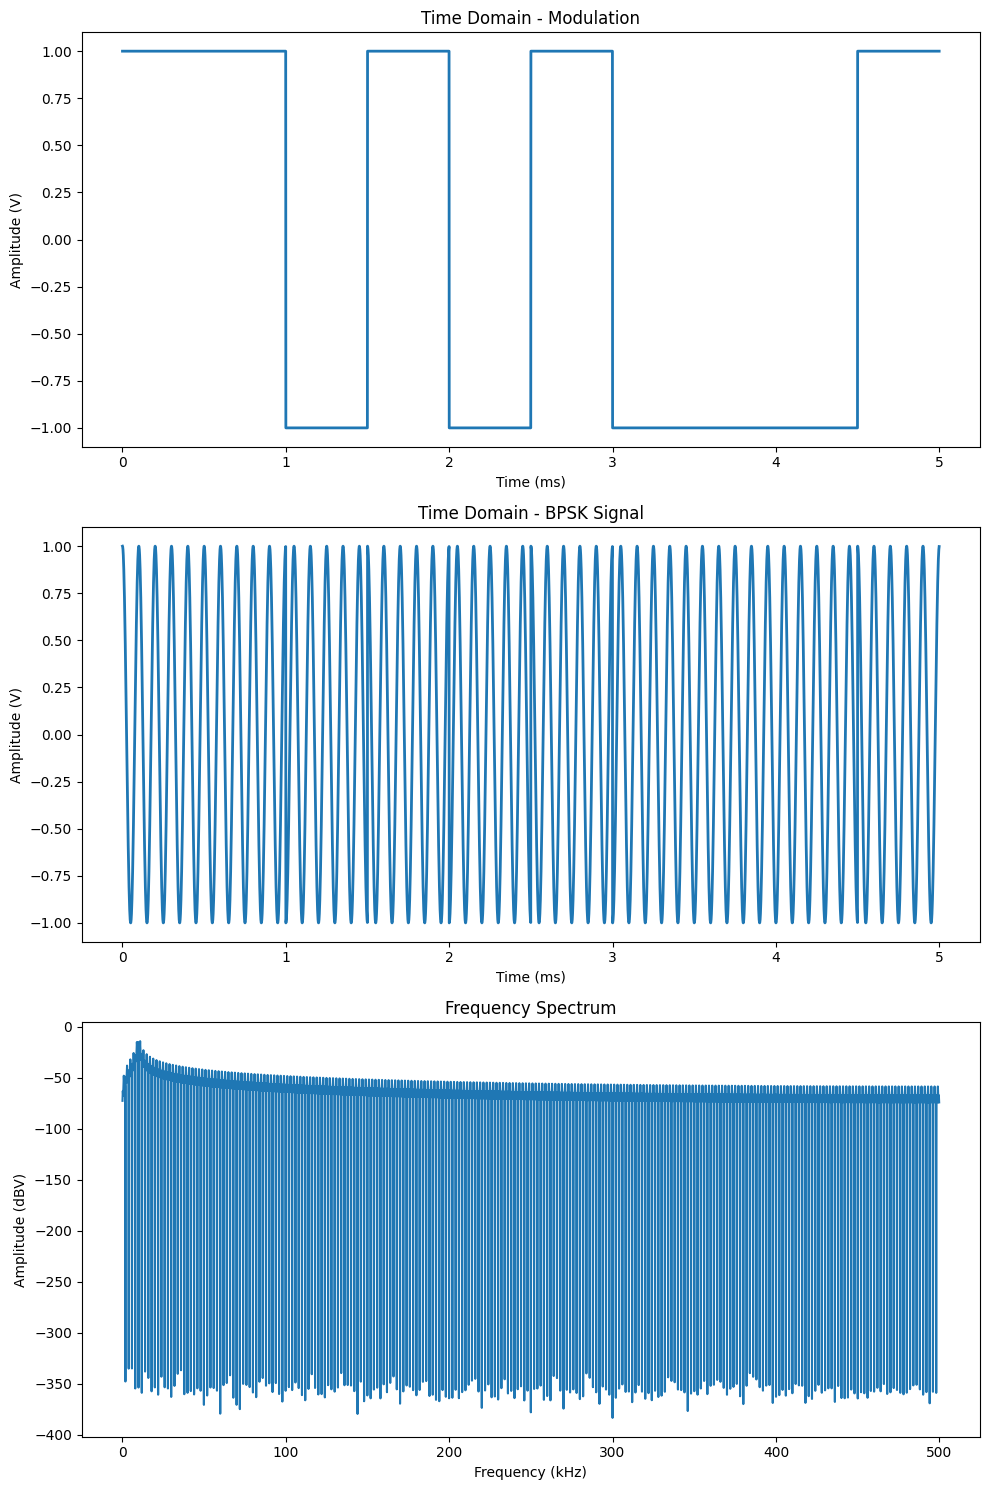

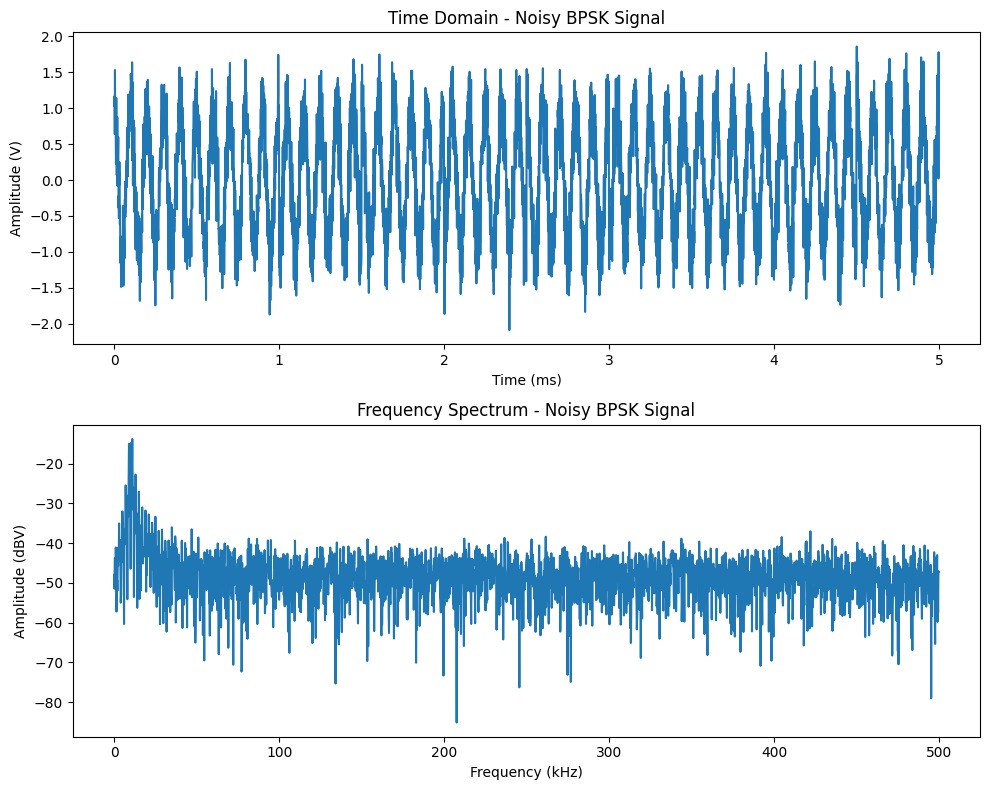

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from numpy.random import normal

# Time base parameters
dt = 1e-6              # Time scale: 1us
fs = 1/dt              # Sampling frequency: 1Mhz
stop = 5e-3            # Stop time: 5ms
t = np.arange(0, stop, dt)   # Discrete time vector
N = len(t)             # Points
fv = np.arange(0, N//2) * fs / N  # Discrete frequency vector

# BPSK pulse
A = 1                  # Amplitude: 1V
fc = 10e3              # Carrier frequency: 10kHz
Rb = 1e3               # Baudrate: 1kbps
code = '1101010001'

# BPSK signal and modulation pattern
bpsk = np.zeros(N)
mod = np.zeros(N)

# Generate BPSK signal
samples_per_code = int(stop * fs / len(code))
for i, bit in enumerate(code):
    start = i * samples_per_code
    end = min(start + samples_per_code, N)
    t_cell = np.linspace(0, (end - start) * dt, end - start, endpoint=False)
    cellp = np.cos(2 * np.pi * fc * t_cell)
    celln = -cellp
    if bit == '0':
        bpsk[start:end] = celln
        mod[start:end] = -1
    else:
        bpsk[start:end] = cellp
        mod[start:end] = 1

s = 20 * np.log10(np.abs(fft(bpsk)[:N//2]) / N)

# Plotting the modulated signal and spectrum
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.plot(t * 1000, mod, linewidth=2)
plt.title('Time Domain - Modulation')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')

plt.subplot(3, 1, 2)
plt.plot(t * 1000, bpsk, linewidth=2)
plt.title('Time Domain - BPSK Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')

plt.subplot(3, 1, 3)
plt.plot(fv / 1000, s)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dBV)')

plt.tight_layout()
plt.show()

# Gaussian distributed random noise
bw = 1e3               # Bandwidth
k = 0.0001             # Power spectral density
grn = normal(0, np.sqrt(k*bw), N)
bpsk_n = bpsk + grn
s_n = 20 * np.log10(np.abs(fft(bpsk_n)[:N//2]) / N)

# Plotting the noisy signal and its spectrum
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t * 1000, bpsk_n)
plt.title('Time Domain - Noisy BPSK Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')

plt.subplot(2, 1, 2)
plt.plot(fv / 1000, s_n)
plt.title('Frequency Spectrum - Noisy BPSK Signal')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dBV)')

plt.tight_layout()
plt.show()


## LFM Pulse

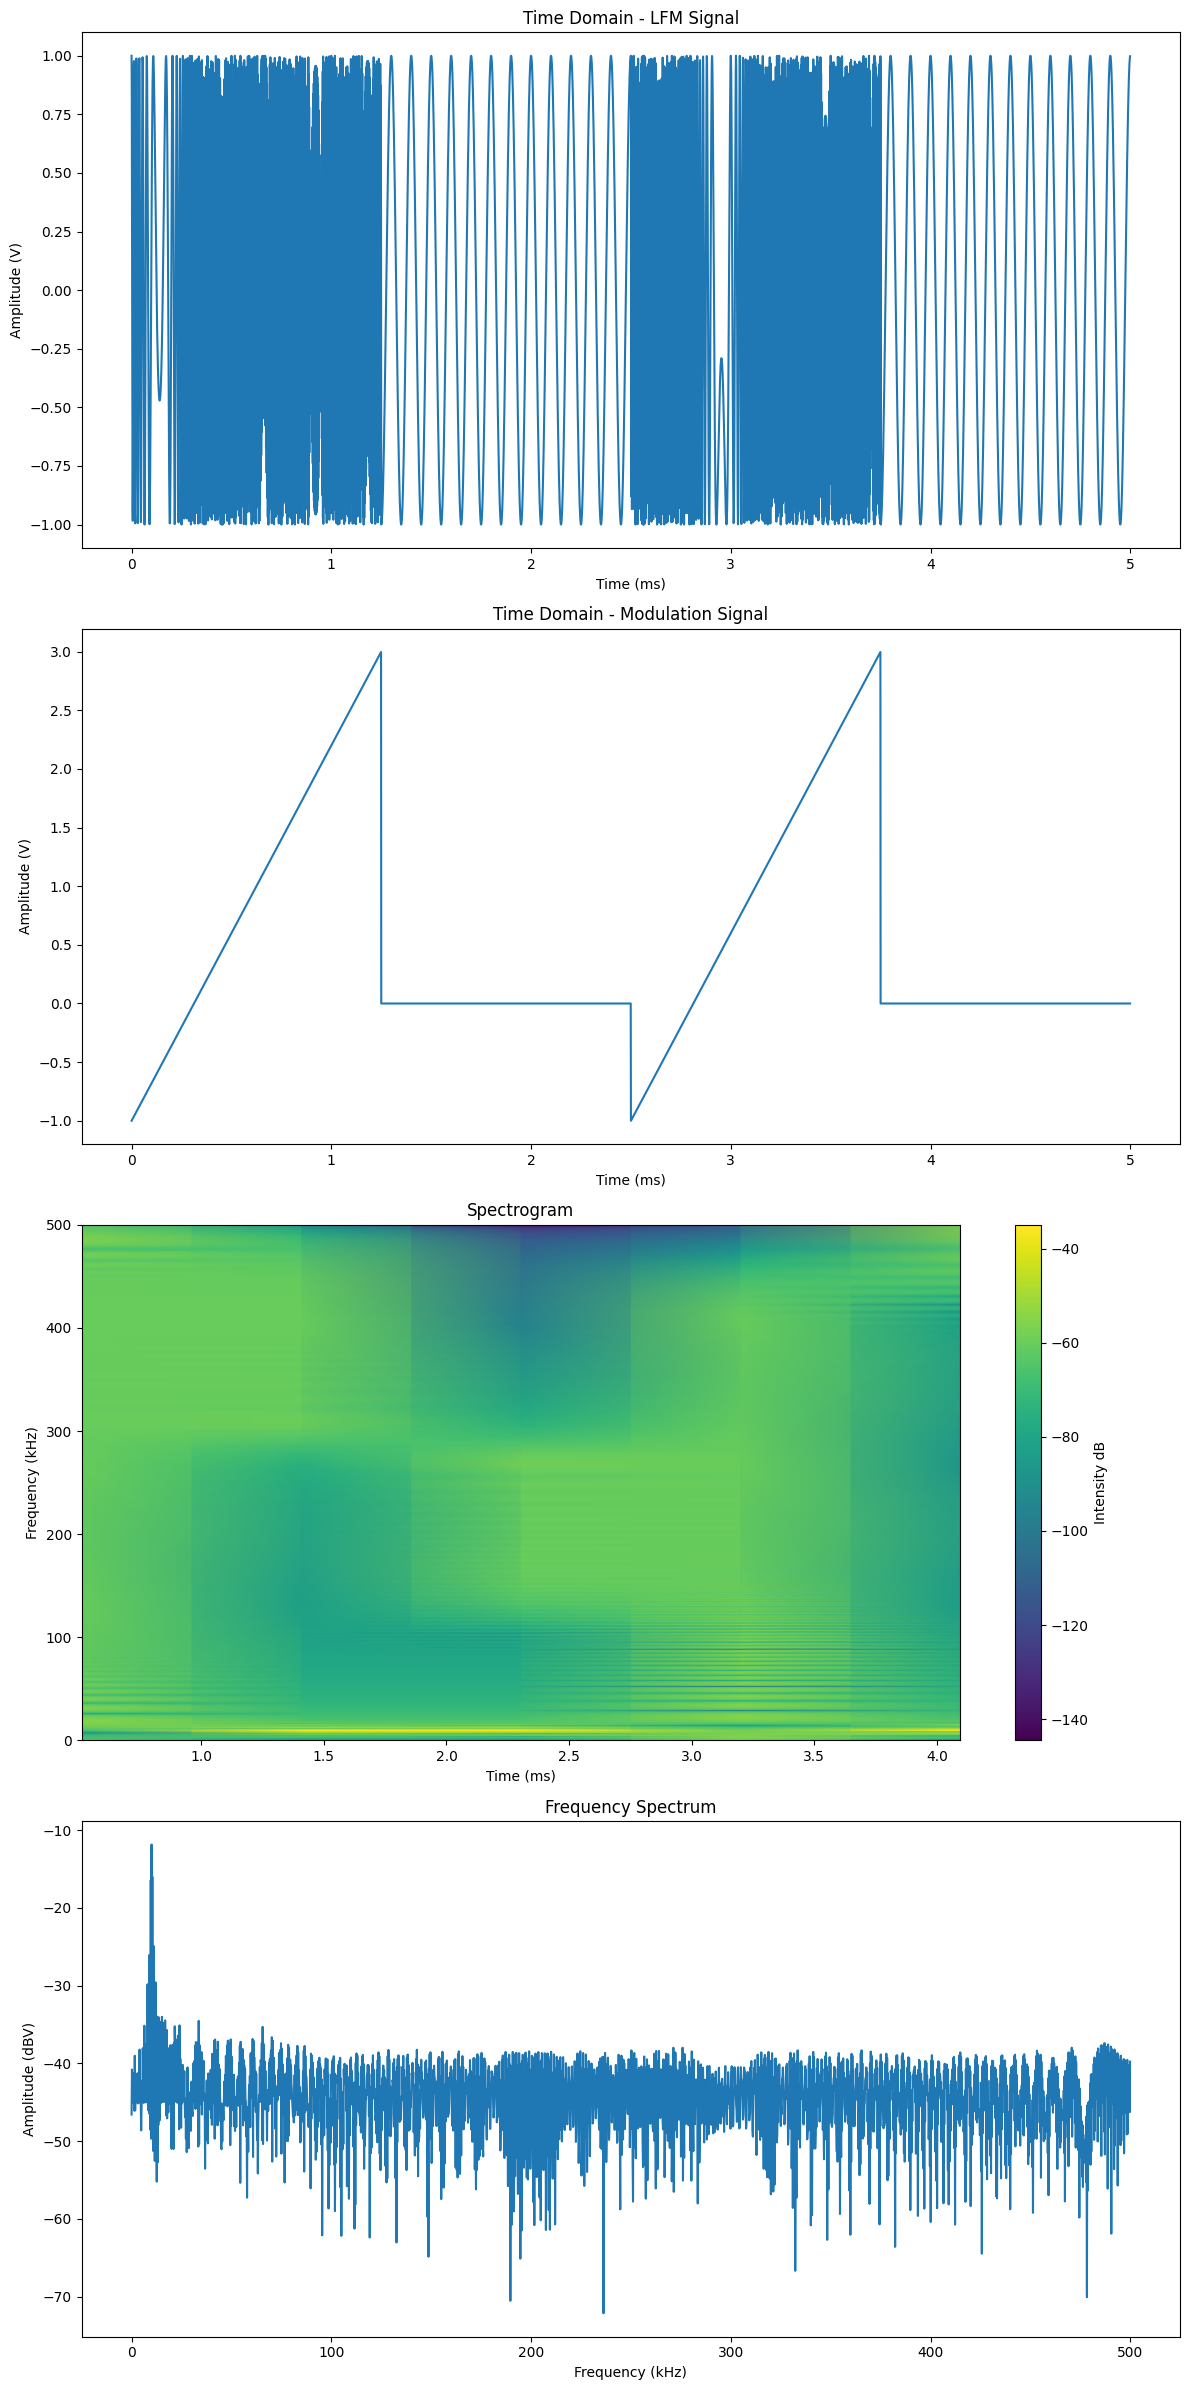

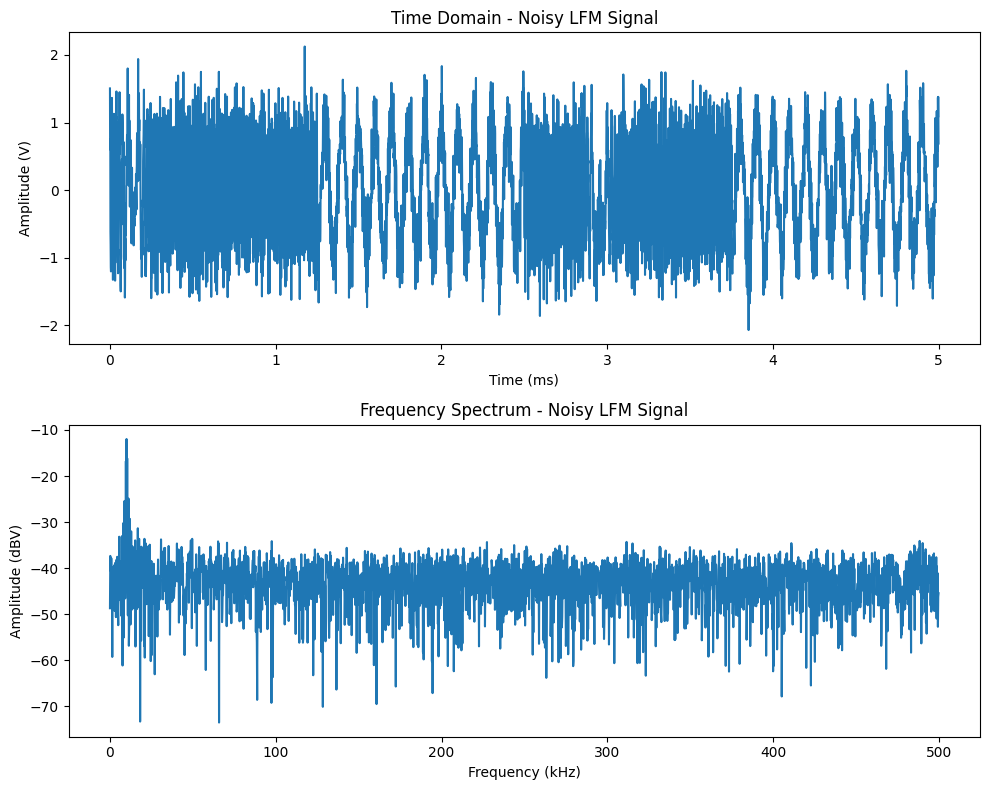

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square, sawtooth, spectrogram
from scipy.fft import fft
from numpy.random import normal

# Time base parameters
dt = 1e-6              # Time scale: 1us
fs = 1/dt              # Sampling frequency: 1Mhz
stop = 5e-3            # Stop time: 5ms
t = np.arange(0, stop, dt)   # Discrete time vector
N = len(t)             # Points
fv = np.arange(0, N//2) * fs / N  # Discrete frequency vector

# Linear FM pulse
A = 1                  # Amplitude: 1V
f0 = 10e3              # Carrier frequency: 10kHz
fshift = 100e3         # Frequency shift: 100kHz
fm = 0.4e3             # Modulation frequency: 40Hz

# Modulation and LFM signal generation
mod = (0.5 * square(2 * np.pi * fm * t, duty=0.5) + 0.5) * (2 * sawtooth(2 * np.pi * fm * t, width=0.5) + 1)
f = f0 + mod * fshift
lfm = A * np.cos(2 * np.pi * f * t)
s = 20 * np.log10(np.abs(fft(lfm)[:N//2]) / N)

# Plotting time domain and spectrum
plt.figure(figsize=(12, 24))
plt.subplot(4, 1, 1)
plt.plot(t * 1000, lfm)
plt.title('Time Domain - LFM Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')

plt.subplot(4, 1, 2)
plt.plot(t * 1000, mod)
plt.title('Time Domain - Modulation Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')

# Spectrogram
plt.subplot(4, 1, 3)
frequencies, times, Sxx = spectrogram(lfm, fs, nperseg=1024)
plt.pcolormesh(times*1000, frequencies/1000, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency (kHz)')
plt.xlabel('Time (ms)')
plt.title('Spectrogram')
plt.colorbar(label='Intensity dB')

plt.subplot(4, 1, 4)
plt.plot(fv / 1000, s)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dBV)')

plt.tight_layout()
plt.show()

# Adding Gaussian noise
bw = 1e3               # Bandwidth
k = 0.0001             # Power spectral density
grn = normal(0, np.sqrt(k * bw), N)
lfm_n = lfm + grn
s_n = 20 * np.log10(np.abs(fft(lfm_n)[:N//2]) / N)

# Plotting the noisy signal and its spectrum
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t * 1000, lfm_n)
plt.title('Time Domain - Noisy LFM Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')

plt.subplot(2, 1, 2)
plt.plot(fv / 1000, s_n)
plt.title('Frequency Spectrum - Noisy LFM Signal')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dBV)')

plt.tight_layout()
plt.show()

## Noise Signal

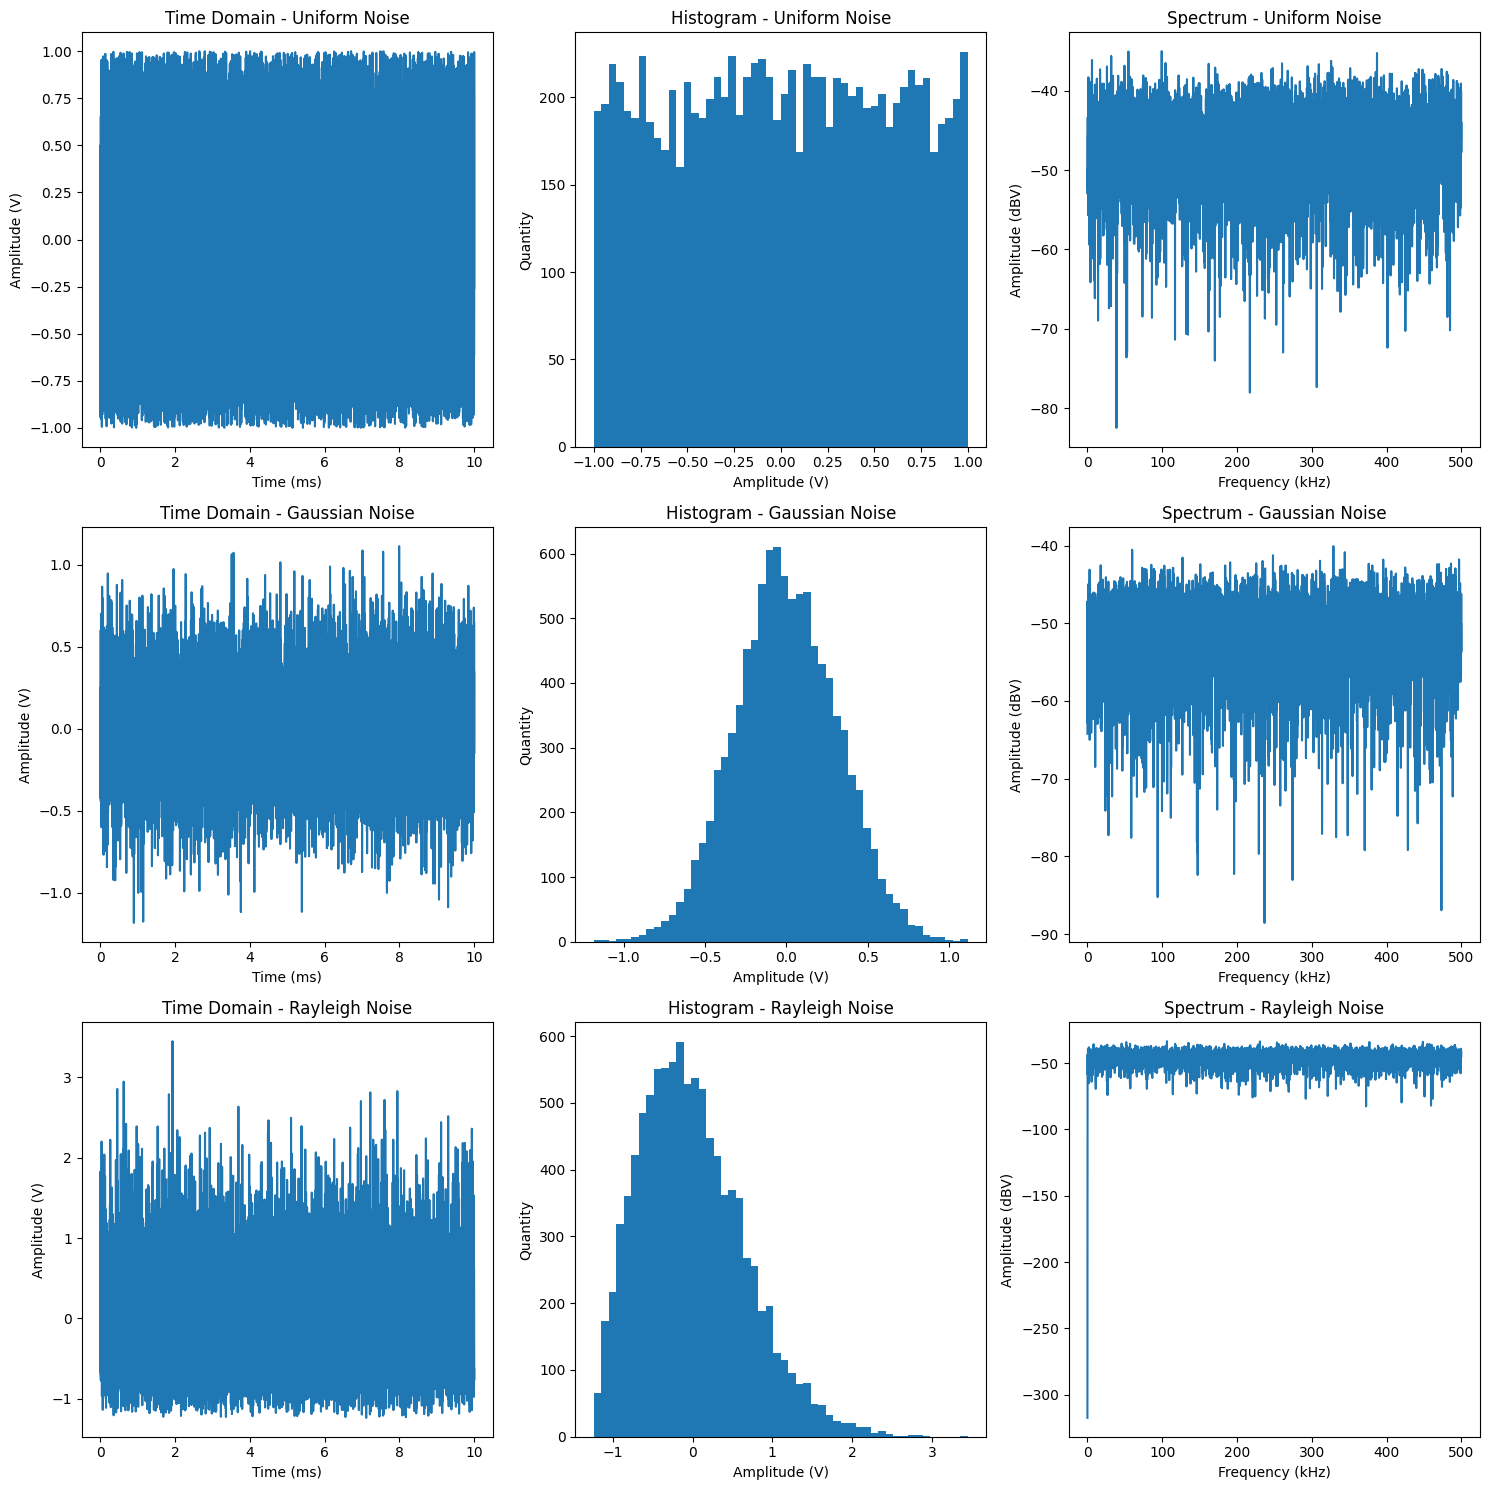

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.stats import rayleigh

# Time base parameters
dt = 1e-6              # Time scale: 1us
f = 1/dt               # Sampling frequency: 1Mhz
T = 10e-3              # Stop time: 10ms
t = np.arange(0, T, dt)  # Discrete time vector
N = len(t)              # Points
fv = np.arange(0, N//2) * f / N  # Discrete frequency vector

# Uniformly distributed random noise
a = -1; b = 1
urn = np.random.uniform(a, b, N)
urnFftAbs = 20 * np.log10(np.abs(fft(urn))/N)

plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.plot(t * 1000, urn)
plt.title('Time Domain - Uniform Noise')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')

plt.subplot(3, 3, 2)
plt.hist(urn, 50)
plt.title('Histogram - Uniform Noise')
plt.xlabel('Amplitude (V)')
plt.ylabel('Quantity')

plt.subplot(3, 3, 3)
plt.plot(fv / 1000, urnFftAbs[:N//2])
plt.title('Spectrum - Uniform Noise')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dBV)')

# Gaussian distributed random noise
bw = 1e3               # Bandwidth
k = 0.0001             # Power spectral density
grn = np.random.normal(0, np.sqrt(k * bw), N)
grnFftAbs = 20 * np.log10(np.abs(fft(grn))/N)

plt.subplot(3, 3, 4)
plt.plot(t * 1000, grn)
plt.title('Time Domain - Gaussian Noise')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')

plt.subplot(3, 3, 5)
plt.hist(grn, 50)
plt.title('Histogram - Gaussian Noise')
plt.xlabel('Amplitude (V)')
plt.ylabel('Quantity')

plt.subplot(3, 3, 6)
plt.plot(fv / 1000, grnFftAbs[:N//2])
plt.title('Spectrum - Gaussian Noise')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dBV)')

# Rayleigh distributed random noise
scale = 1  # Rayleigh distribution scale parameter
rrn = rayleigh.rvs(scale, size=N)
dc = np.mean(rrn)
rrn = rrn - dc
rrnFftAbs = 20 * np.log10(np.abs(fft(rrn))/N)

plt.subplot(3, 3, 7)
plt.plot(t * 1000, rrn)
plt.title('Time Domain - Rayleigh Noise')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')

plt.subplot(3, 3, 8)
plt.hist(rrn, 50)
plt.title('Histogram - Rayleigh Noise')
plt.xlabel('Amplitude (V)')
plt.ylabel('Quantity')

plt.subplot(3, 3, 9)
plt.plot(fv / 1000, rrnFftAbs[:N//2])
plt.title('Spectrum - Rayleigh Noise')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dBV)')

plt.tight_layout()
plt.show()

## Radar Signal

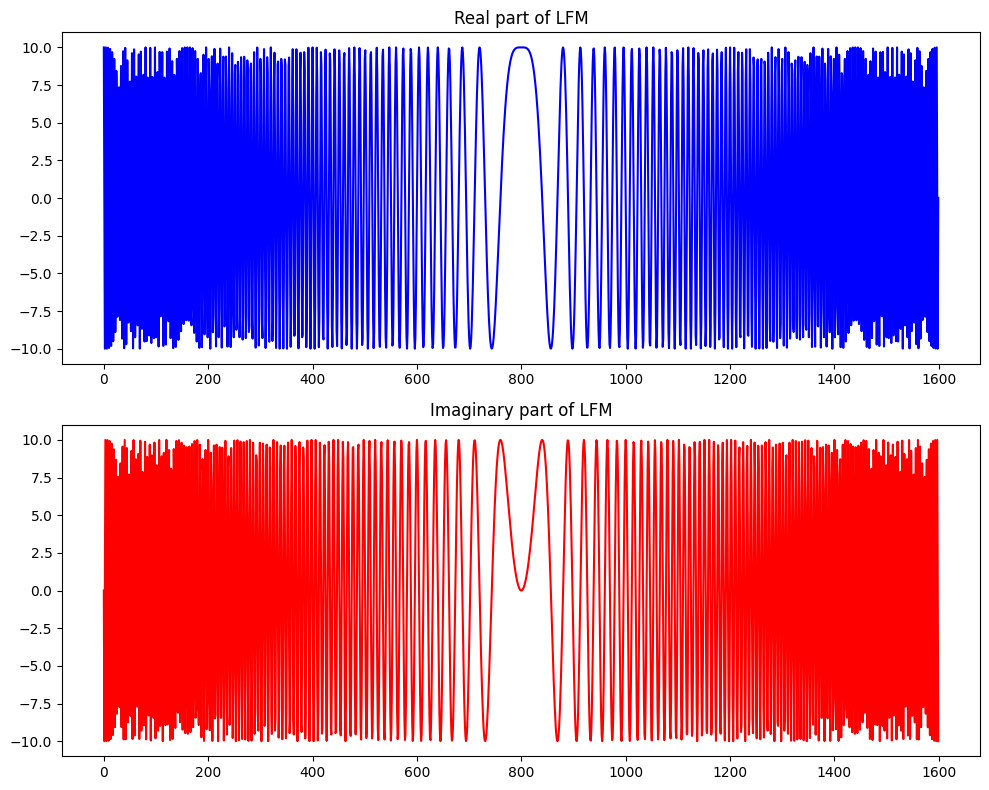

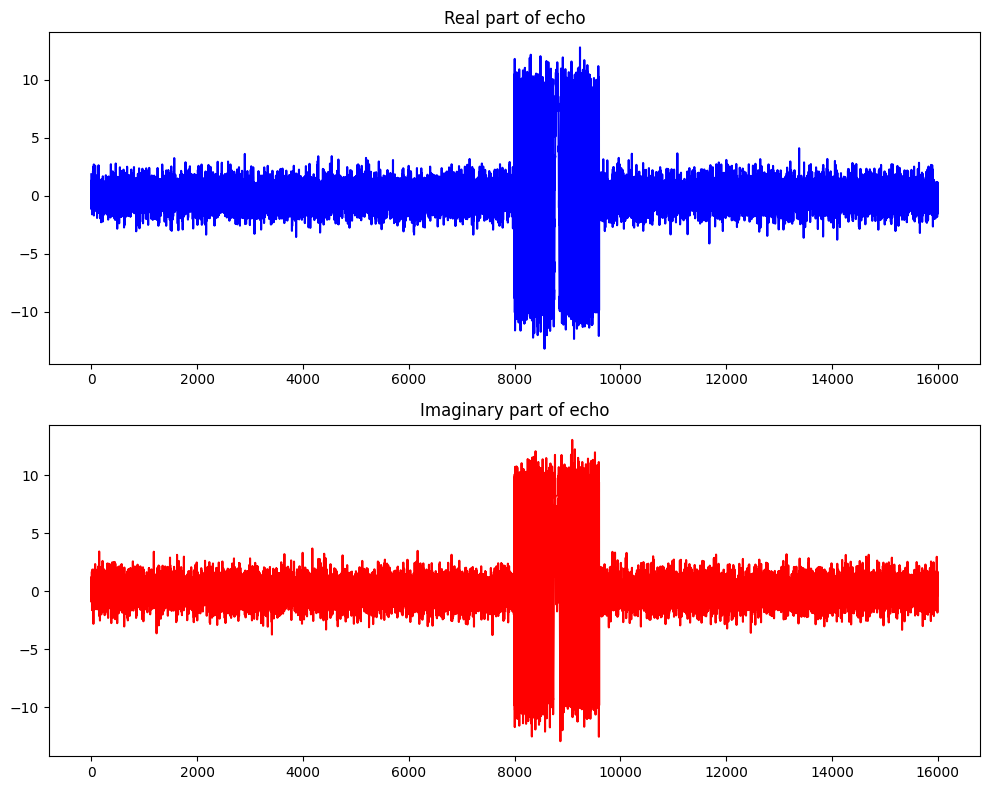

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# LFM parameters
B = 4e6        # Bandwidth: 4MHz
Tao = 200e-6   # Time width: 200us
T = 2e-3       # Pulse repeats period: 2ms
fs = 8e6       # Sampling frequency
SNR = 20       # SNR: 20dB
dis = int(T * fs / 2)  # Target position: middle

# Generate LFM
t = np.arange(-int(Tao * fs / 2), int(Tao * fs / 2))
lfm = (10**(SNR/20)) * np.exp(1j * np.pi * B / Tao * (t / fs)**2)

# Plotting LFM
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(np.real(lfm), 'b')
plt.title('Real part of LFM')
plt.subplot(2, 1, 2)
plt.plot(np.imag(lfm), 'r')
plt.title('Imaginary part of LFM')
plt.tight_layout()

# Generate echo
echo = np.zeros(int(T * fs), dtype=complex)
echo[dis:dis + len(lfm)] = lfm
noise = np.random.normal(0, 1, int(T * fs)) + 1j * np.random.normal(0, 1, int(T * fs))
echo += noise

# Plotting echo
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(np.real(echo), 'b')
plt.title('Real part of echo')
plt.subplot(2, 1, 2)
plt.plot(np.imag(echo), 'r')
plt.title('Imaginary part of echo')
plt.tight_layout()
plt.show()